<a href="https://colab.research.google.com/github/harshitadubey7/Currency-Converter/blob/main/Emotion_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount drive and navigate to project folder

In [3]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd '/content/drive/My Drive/Face.Data'


/content/drive/My Drive/Face.Data


In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Then move directly to Face.Data
%cd '/content/drive/My Drive/Face.Data'

# Confirm
!pwd
!ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Face.Data
/content/drive/My Drive/Face.Data
 best_keypoint_model.keras	     icml_face_data.csv
'detection (1).json'		     icml_face_data.txt
 detection.json			     IdLookupTable.csv
 FacialExpression_best_model.keras   training_cleaned.csv
 FacialExpression-model.json	     training.csv
 FacialKeyPoints-model.json


# PART 1. FACIAL KEY POINTS DETECTION

In [6]:
# Import the necessary packages
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

### LOAD THE DATASET

In [7]:
# load facial key points data
keyfacial_df = pd.read_csv('/content/drive/My Drive/Face.Data/training.csv')

In [8]:
keyfacial_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [9]:
# Check if null values exist in the dataframe
keyfacial_df.isnull().sum()


,0
left_eye_center_x,10
left_eye_center_y,10
right_eye_center_x,13
right_eye_center_y,13
left_eye_inner_corner_x,4778
left_eye_inner_corner_y,4778
left_eye_outer_corner_x,4782
left_eye_outer_corner_y,4782
right_eye_inner_corner_x,4781
right_eye_inner_corner_y,4781


In [10]:
# The images are located in the last column and pixels coded into text
keyfacial_df['Image']

,Image
0,238 236 237 238 240 240 239 241 241 243 240 23...
1,219 215 204 196 204 211 212 200 180 168 178 19...
2,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,147 148 160 196 215 214 216 217 219 220 206 18...
...,...
7044,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,254 254 254 254 254 238 193 145 121 118 119 10...


In [11]:
type(keyfacial_df['Image'][0])

str

In [12]:
# Convert 'Image' field from text back to images which can be displayed
# Since values for the image are given as space separated string, separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96, 96)
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [13]:
# verify the shape of the image
keyfacial_df['Image'][0].shape

(96, 96)

### VISUALIZE IMAGES

In [14]:
def display_image_and_keypoints(df):
  '''display a ramdom image and the associated keypoints from a dataset df'''
  # Get a random index from the dataframe's current index
  i = df.index[np.random.randint(0, len(df.index))]
  plt.imshow(df['Image'][i], cmap = 'gray')
  for j in range(1, 31, 2):
          plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')

/tmp/ipython-input-14-3276055553.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')


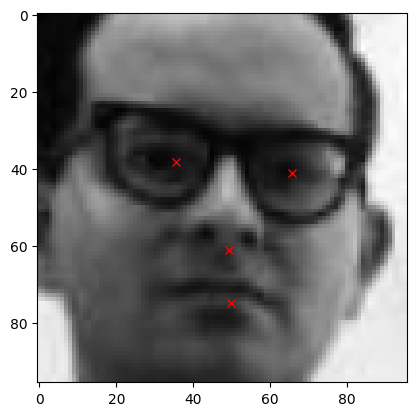

In [15]:
# Plot a random image from the dataset along with facial keypoints.
# Image data is obtained from df['Image'] and plotted using plt.imshow
# 15 x and y coordinates for the corresponding image
# since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..
# we access their value using .loc command, which get the values for coordinates of the image based on the column it is refering to.

display_image_and_keypoints(keyfacial_df)

/tmp/ipython-input-14-3276055553.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')


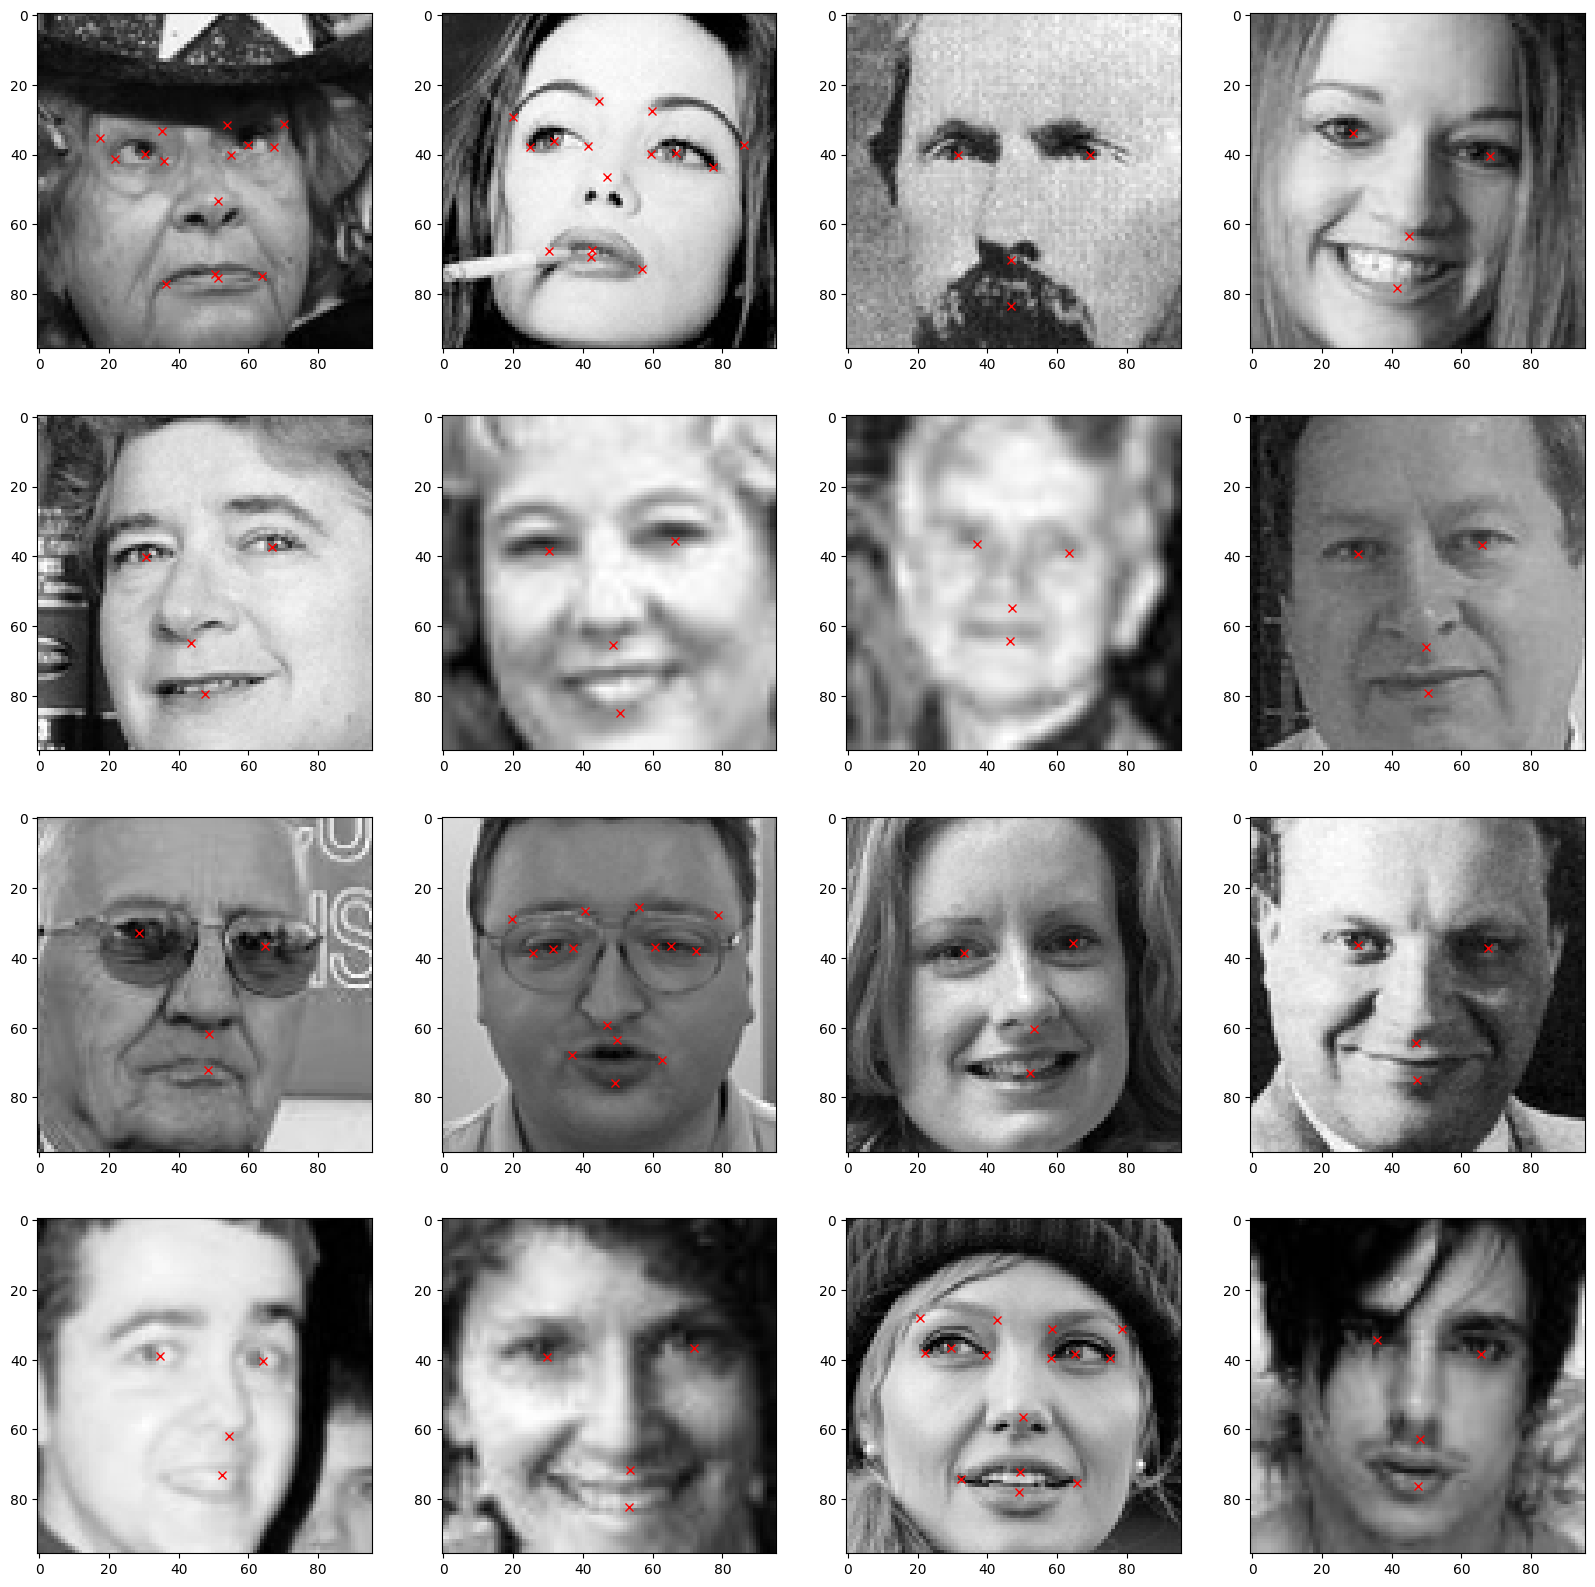

In [16]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    display_image_and_keypoints(keyfacial_df)

### PERFORM IMAGE AUGMENTATION

In [17]:
# Create a new copy of the dataframe
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [18]:
# Obtain the columns in the dataframe
columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [19]:
# CHANGE: Store original data first
augmented_datasets = []
augmented_datasets.append(keyfacial_df.copy())


In [20]:
# Horizontal Flip - flip the images along y axis
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

# since we are flipping horizontally, y coordinate values would be the same
# Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

In [21]:
# CHANGE: Add flipped data to augmentation list
augmented_datasets.append(keyfacial_df_copy.copy())


/tmp/ipython-input-22-3720356827.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')


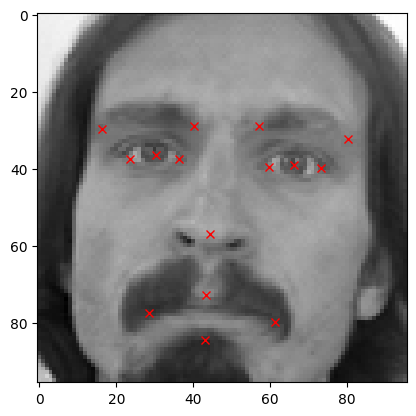

In [22]:
# Show the Original image
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

/tmp/ipython-input-23-2009087320.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')


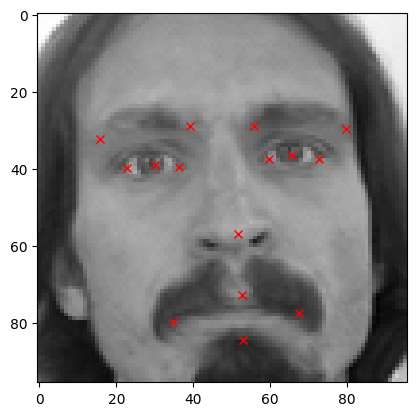

In [23]:
# Show the Horizontally flipped image
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [25]:
import numpy as np
import pandas as pd
import copy

augmented_datasets = []

# Utility function to apply brightness change
def apply_brightness(image_array, factor):
    return np.clip(image_array * factor, 0, 255).astype(np.uint8)

# Utility function to add noise
def add_noise(image_array, scale):
    noise = np.random.normal(0, scale, image_array.shape)
    return np.clip(image_array + noise, 0, 255).astype(np.uint8)

# Utility function to adjust contrast
def adjust_contrast(image_array, factor):
    # Simple contrast adjustment around the mean
    mean = np.mean(image_array)
    return np.clip(factor * (image_array - mean) + mean, 0, 255).astype(np.uint8)


# Add the original dataset first
augmented_datasets.append(keyfacial_df.copy())

# Apply multiple brightness levels
for brightness_factor in [0.7, 1.3, 1.7, 2.0]:
    keyfacial_df_bright = copy.deepcopy(keyfacial_df)
    keyfacial_df_bright['Image'] = keyfacial_df_bright['Image'].apply(
        lambda x: apply_brightness(x, brightness_factor)
    )
    augmented_datasets.append(keyfacial_df_bright)

# Add noise augmentation
keyfacial_df_noise = copy.deepcopy(keyfacial_df)
keyfacial_df_noise['Image'] = keyfacial_df_noise['Image'].apply(
    lambda x: add_noise(x, 8)
)
augmented_datasets.append(keyfacial_df_noise)

# Add contrast augmentation
keyfacial_df_contrast = copy.deepcopy(keyfacial_df)
keyfacial_df_contrast['Image'] = keyfacial_df_contrast['Image'].apply(
    lambda x: adjust_contrast(x, 1.3)
)
augmented_datasets.append(keyfacial_df_contrast)

# Concatenate all augmented datasets along with the original
augmented_df = pd.concat(augmented_datasets, ignore_index=True)
print(f"Augmented dataset shape: {augmented_df.shape}")

Augmented dataset shape: (49343, 31)


/tmp/ipython-input-26-4183091506.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')


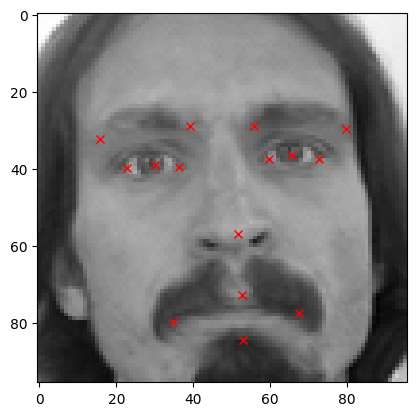

In [26]:
# Show Image with increased brightness

plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

### PERFORM DATA NORMALIZATION AND TRAINING DATA PREPARATION

In [28]:
# Obtain the value of images which is present in the 'Image' column
img = np.stack(augmented_df['Image'].values)

# Normalize the images
img = img / 255.

# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the img list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(49343, 96, 96, 1)

In [30]:
# Obtain the value of x & y coordinates which are to used as target.
# Exclude the 'Image' column
y = augmented_df.drop('Image', axis=1).values
y = np.asarray(y).astype(np.float32)
y.shape

(49343, 30)

In [31]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
X_train.shape

(39474, 96, 96, 1)

In [33]:
X_test.shape

(9869, 96, 96, 1)

### BUILD DEEP RESIDUAL NEURAL NETWORK KEY FACIAL POINTS DETECTION MODEL

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, ZeroPadding2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform

# RES_BLOCK - Your original function with fixes
def res_block(X, filter, stage):
    # Convolutional_block
    X_copy = X
    f1, f2, f3 = filter

    # Main Path
    X = Conv2D(f1, (1,1), strides=(1,1), name='res_'+str(stage)+'_conv_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((2,2))(X)  # Fixed: MaxPool2D -> MaxPooling2D
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name='res_'+str(stage)+'_conv_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_conv_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_c')(X)

    # Short path
    X_copy = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_conv_copy', kernel_initializer=glorot_uniform(seed=0))(X_copy)
    X_copy = MaxPooling2D((2,2))(X_copy)  # Fixed: MaxPool2D -> MaxPooling2D
    X_copy = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_copy')(X_copy)

    # ADD
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X

    # Main Path
    X = Conv2D(f1, (1,1), strides=(1,1), name='res_'+str(stage)+'_identity_1_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name='res_'+str(stage)+'_identity_1_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_identity_1_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_c')(X)

    # ADD
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    # Identity Block 2
    X_copy = X

    # Main Path
    X = Conv2D(f1, (1,1), strides=(1,1), name='res_'+str(stage)+'_identity_2_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding='same', name='res_'+str(stage)+'_identity_2_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+'_identity_2_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_c')(X)

    # ADD
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X

In [35]:
# FACIAL KEYPOINT DETECTION MODEL - Your original model code
input_shape = (96, 96, 1)  # Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides=(2,2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2))(X)

# 2 - stage
X = res_block(X, filter=[64,64,256], stage=2)

# 3 - stage
X = res_block(X, filter=[128,128,512], stage=3)

# Average Pooling
X = AveragePooling2D((2,2), name='Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation='relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation='relu')(X)

model_1_facialKeyPoints = Model(inputs=X_input, outputs=X)
model_1_facialKeyPoints.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 102, 102,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 48, 48,    │      3,200 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 48, 48,    │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 23, 23,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_a        │ (None, 23, 23,    │      4,160 │ max_pooling2d[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 11, 11,    │          0 │ res_2_conv_a[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_a         │ (None, 11, 11,    │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 11, 11,    │          0 │ bn_2_conv_a[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_b        │ (None, 11, 11,    │     36,928 │ activation_1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_b         │ (None, 11, 11,    │        256 │ res_2_conv_b[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 11, 11,    │          0 │ bn_2_conv_b[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_copy     │ (None, 23, 23,    │     16,640 │ max_pooling2d[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_c        │ (None, 11, 11,    │     16,640 │ activation_2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 11, 11,    │          0 │ res_2_conv_copy[… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_c         │ (None, 11, 11,    │      1,024 │ res_2_conv_c[0][

 Total params: 18,016,286 (68.73 MB)

 Trainable params: 18,007,710 (68.69 MB)

 Non-trainable params: 8,576 (33.50 KB)

### COMPILE AND TRAIN KEY FACIAL POINTS DETECTION DEEP LEARNING MODEL

In [36]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
# using of MSE loss metric as we are doing regression to predict coordinates in a continuous space
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

In [37]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.keras", verbose = 1, save_best_only = True)

In [38]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 256, epochs = 15, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.8718 - loss: nan
Epoch 1: val_loss did not improve from inf
147/147 ━━━━━━━━━━━━━━━━━━━━ 62s 199ms/step - accuracy: 0.8720 - loss: nan - val_accuracy: 0.9098 - val_loss: nan
Epoch 2/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9050 - loss: nan
Epoch 2: val_loss did not improve from inf
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9050 - loss: nan - val_accuracy: 0.9098 - val_loss: nan
Epoch 3/15
146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9094 - loss: nan
Epoch 3: val_loss did not improve from inf
147/147 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.9094 - loss: nan - val_accuracy: 0.9098 - val_loss: nan
Epoch 4/15
146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9056 - loss: nan
Epoch 4: val_loss did not improve from inf
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.9056 - loss: nan - val_accuracy: 0.9098 - val_loss: nan
Epoch 5/15
146/147 ━━━━━━━━━━━━━━━━━━━

In [39]:
# save the model architecture to json file for future use
model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)


### ASSESS TRAINED KEY FACIAL POINTS DETECTION MODEL PERFORMANCE

In [43]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
json_path = '/content/drive/MyDrive/Face.Data/FacialKeyPoints-model.json'
weights_path = '/content/drive/MyDrive/Face.Data/FacialKeyPoints_weights.keras'


In [48]:
import os
print(os.getcwd())


/content/drive/MyDrive/Face.Data


In [41]:
# Load best model weights (if provided)
with open('FacialKeyPoints-model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('FacialKeyPoints_weights.keras')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

FileNotFoundError: [Errno 2] No such file or directory: 'FacialKeyPoints_weights.keras'

In [ ]:
# Evaluate the model
result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

In [ ]:
# Get the model keys
history.history.keys()

In [ ]:
# Plot the training artifacts
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# PART 2. FACIAL EXPRESSION DETECTION

### IMPORT & EXPLORE DATASET FOR FACIAL EXPRESSION DETECTION

In [ ]:
# read the csv files for the facial expression data
facialexpression_df = pd.read_csv('/content/drive/My Drive/Face.Data/icml_face_data.csv')

In [ ]:
facialexpression_df

In [ ]:
facialexpression_df[' pixels'][0] # String format

In [ ]:
# function to convert pixel values in string format to array format
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [ ]:
# Resize images from (48, 48) to (96, 96)
def resize(x):
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [ ]:
facialexpression_df.head()

In [ ]:
# check the shape of data_frame
facialexpression_df.shape

In [ ]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

### VISUALIZE IMAGES AND PLOT LABELS

In [ ]:
emotions = [0, 1, 2, 3, 4]
fig = plt.figure(figsize=(20, 20))

for i in emotions:
  ax = fig.add_subplot(1, 5, i+1)
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.title(label_to_text[i], fontdict={'color':'blue'})
  plt.imshow(img, cmap = 'gray')

In [ ]:
facialexpression_df.emotion.value_counts()

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

### PERFORM DATA PREPARATION AND IMAGE AUGMENTATION

In [ ]:
# split the dataframe in to features and labels
from tensorflow.keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])

In [ ]:
X[0]

In [ ]:
y

In [ ]:
X.shape

In [ ]:
X[0].shape

In [ ]:
X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

In [ ]:
# split the dataframe in to train, test and validation data frames
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)

In [ ]:
print(X_val.shape, y_val.shape)

In [ ]:
print(X_Test.shape, y_Test.shape)

In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
# image pre-processing
X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [ ]:
train_datagen = ImageDataGenerator(
                                  rotation_range = 15,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  shear_range = 0.1,
                                  zoom_range = 0.1,
                                  horizontal_flip = True,
                                  brightness_range=(0.0,0.1),
                                  fill_mode = "nearest"
                                  )

### BUILD AND TRAIN DEEP LEARNING MODEL FOR FACIAL EXPRESSION CLASSIFICATION

In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

In [ ]:
# train the network
# Here we are using categorical_crossentropy loss metric as we are predicting multiclasses (binary crossentropy otherwise)
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping
earlystopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=20
)

# Save the best full model (Keras 3 requires `.keras`)
checkpointer = ModelCheckpoint(
    filepath="FacialExpression_best_model.keras",  # ✅ Required extension
    verbose=1,
    save_best_only=True
)


In [ ]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=256),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 256,
	epochs= 15, callbacks=[checkpointer, earlystopping])

In [ ]:
# saving the model architecture to json file for future use

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

### ASSESS THE PERFORMANCE OF TRAINED FACIAL EXPRESSION CLASSIFIER MODEL

In [ ]:
with open('FacialExpression-model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
# load pretrained model weigths (provided)
model_2_emotion.load_weights('FacialExpression_best_model.keras')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(accuracy))
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1,2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

ax = fig.add_subplot(1,2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
# predicted_classes = model.predict_classes(X_test)
# collect the index of the highest prediction probability corrsponding to the predicted emotion class
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

In [ ]:
y_true.shape

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (7, 7))
sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
plt.show()

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()
for i in np.arange(0, L*W):
    j = np.random.randint(1, len(X_Test))
    prediction = predicted_classes[j]
    ground_truth = y_true[j]
    axes[i].imshow(X_Test[j].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[prediction], label_to_text[ground_truth]),color=("green" if label_to_text[prediction]==label_to_text[ground_truth] else "red"))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

# PART 3. COMBINE BOTH FACIAL EXPRESSION AND KEY POINTS DETECTION MODELS

### COMBINE BOTH MODELS (1) FACIAL KEY POINTS DETECTION AND (2) FACIAL EXPRESSION MODELS

In [ ]:
def predict(X_test):

  # Making prediction from the keypoint model
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Making prediction from the emotion model
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
df_predict = predict(X_test)

In [ ]:
df_predict.head()

In [ ]:
# Plotting the test images and their predicted keypoints and emotions
L = 4
W = 4

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()
for i in np.arange(0, L*W):
    j = np.random.randint(1, len(X_test))
    axes[i].imshow(X_test[j].reshape(96,96), cmap = 'gray')
    for k in range(1, 31, 2):
        axes[i].plot(df_predict.loc[j][k-1], df_predict.loc[j][k], 'rx')
    emotion = df_predict.loc[j,'emotion']
    axes[i].set_title("prediction: {}".format(label_to_text[emotion]))
    axes[i].axis('off')